In [1]:
import numpy as np
import matplotlib.pyplot as plt
import queue
import mpld3

In [2]:
def GenerateGraph(size):
    max_iter = size*10
    max_coord = 100
    points = np.random.randint(100,size=(size,2))
    edges = []
    for i in range(0,size):
        connections = np.random.randint(1,size/2)
        it = 0
        while connections>0 and it<max_iter:
            it+=1
            opposite = np.random.randint(size)
            edge = [i,opposite]
            inv_edge = [opposite,i]
            if edge in edges or inv_edge in edges or i == opposite:
                continue
            else:
                edges += [edge]
                connections -= 1
    return [points,edges]

In [3]:
def DrawGraph(graph):
    for edge in graph[1]:
        vfrom = graph[0][edge[0]]
        vto = graph[0][edge[1]]
        plt.plot([vfrom[0],vto[0]],[vfrom[1],vto[1]],'b')
    plt.plot(graph[0][:,0],graph[0][:,1],'go')
    plt.show()

In [45]:
def DrawColoredGraph(graph,painting):
    print(sum(painting))
    fig,ax = plt.subplots()
    for edge in graph[1]:
        vfrom = graph[0][edge[0]]
        vto = graph[0][edge[1]]
        ax.plot([vfrom[0],vto[0]],[vfrom[1],vto[1]],'b',linewidth=0.75)
    #ax.scatter(graph[0][:,0],graph[0][:,1])
    for i in range(0,len(graph[0])):
        if painting[i] == 1:
            ax.plot(graph[0][i][0],graph[0][i][1],'ko',markersize=10)
        else:
            ax.plot(graph[0][i][0],graph[0][i][1],'ko',fillstyle='none',markersize=10)
        
        #ax.annotate(str(i),(graph[0][i][0],graph[0][i][1]))
    plt.show()

In [18]:
def PaintGraph(graph):
    points = graph[0]
    edges = [[]]*len(points)
    res_painting = [0]*len(points)
    for edge in graph[1]:
        edges[edge[0]] = edges[edge[0]] + [edge[1]]
        edges[edge[1]] = edges[edge[1]] + [edge[0]]
    for i in range(len(points)):
        used = [False]*len(points)
        painting = [0]*len(points)
        q = queue.Queue()
        q.put(i)
        while not q.empty():
            curr = q.get()
            used[curr] = True
            col = 1
            for k in edges[curr]:
                if painting[k] == 1:
                    col = 0
                    break
            painting[curr] = col
            for j in edges[curr]:
                if not used[j]:
                    q.put(j)
        if sum(painting) > sum(res_painting):
            res_painting = painting
    return res_painting

In [66]:
graph = GenerateGraph(10)

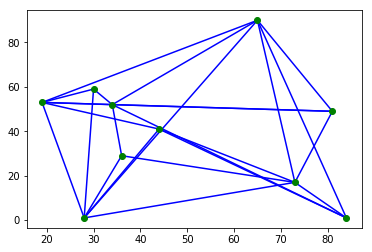

In [67]:
mpld3.enable_notebook()
DrawGraph(graph)

4


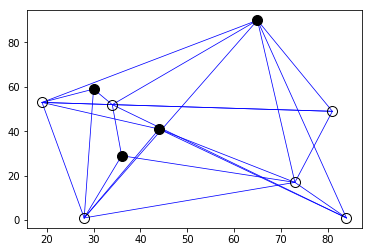

In [68]:
mpld3.enable_notebook()
DrawColoredGraph(graph,PaintGraph(graph))